# Inladen packages  & dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn import linear_model

df=pd.read_excel("Complete-dataset.xlsx")

In [68]:
df.head()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,6.14,-0.16,2.3,GH2-04,6.3,2011,CAP,Fresh,Vitros,4.508
1,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,7.59,-0.01,2.5,GH2-05,7.6,2011,CAP,Fresh,Vitros,4.900
2,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,9.42,0.22,3,GH2-06,9.2,2011,CAP,Fresh,Vitros,5.880
3,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,5.42,-0.18,2.3,GH2-01,5.6,2012,CAP,Fresh,Vitros,4.508
4,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,9.34,-0.06,2.6,GH2-02,9.4,2012,CAP,Fresh,Vitros,5.096


# Business understanding

Deelvraag: Hoe verandert een merk over de jaren heen? (voorspelling total error)


Voor het Isala ziekenhuis is het van belang om inzicht te hebben hoe verschillende metingen worden uitgevoerd. Door voorspellingen te doen, zou het Isala ziekenhuis tijdig kunnen ingrijpen. Doordat sommige meetmehodes maar één keer in het rapport voorkomen, focussen we ons eerst op de fabrikant.


# Data understanding
Welke databronnen zijn gegeven en in welk formaat:
Een excel bestand genaamd: Complete-dataset.xlsx

Hoe groot zijn deze databronnen:
291 kB

-4684 rows

-12 cols

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4604 non-null   object 
 3   Bias                 4060 non-null   object 
 4   CV                   4586 non-null   object 
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   int64  
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4682 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 439.2+ KB


In [70]:
df.isna().sum()
#Bias, CV? Leeg -> Geen total error
df.dropna()

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Manufacturer,Total Error
0,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,6.14,-0.16,2.3,GH2-04,6.30,2011,CAP,Fresh,Vitros,4.508
1,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,7.59,-0.01,2.5,GH2-05,7.60,2011,CAP,Fresh,Vitros,4.900
2,(Ortho Clin Diag) Vitros 5.1 FS Chem System,183,9.42,0.22,3,GH2-06,9.20,2011,CAP,Fresh,Vitros,5.880
3,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,5.42,-0.18,2.3,GH2-01,5.60,2012,CAP,Fresh,Vitros,4.508
4,(Ortho Clin Diag) Vitros 5.1 FS Chem System,210,9.34,-0.06,2.6,GH2-02,9.40,2012,CAP,Fresh,Vitros,5.096
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,9.08,0.22,3.1,GH5-01,8.86,2021,CAP,Fresh,Vitros,6.076
4680,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,6.86,0.02,2.6,GH5-02,6.84,2021,CAP,Fresh,Vitros,5.096
4681,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,9.4,0.01,3.4,GH5-03,9.39,2021,CAP,Fresh,Vitros,6.664
4682,Vitros 5.1 FS/4600/5600/XT7600 Chem. Systems,204,6.14,0.01,2.5,GH5-04,6.13,2021,CAP,Fresh,Vitros,4.900


In [71]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reference Value,4656.0,7.361971,1.864492,4.92,5.80,7.100,8.65,13.000
Year,4684.0,2015.568531,4.261448,2006.00,2013.00,2017.000,2019.00,2021.000
Total Error,4682.0,5.759066,2.980117,0.00,3.92,5.096,6.86,28.216


In [72]:
#Hoeveel metingen per merk
df["Manufacturer"].value_counts()


Siemens                       982
Bio-Rad                       788
Roche                         618
Beckman Coulter               384
Tosoh                         349
Abbott                        310
Sebia                         203
Trinity Biotech               188
Vitros                        162
Alere                         121
Arkray                         95
Axis-Shield                    57
Roche Diagnostics              56
Menarini                       52
Primus                         42
Roche/Hitachi                  42
Bayer                          36
Olympus                        30
Metrika                        30
Dade Behring                   24
Synchron                       24
Not specified                  20
JEOL                           15
Bayer/Metrika                  15
Medinor                         6
HemoCue                         6
Lifotronic                      4
EKF Diagnostics                 4
Sysmex                          4
Thermo Scienti

In [73]:
#Hoeveel unieke merken
df["Manufacturer"].nunique()

35

# Data preparation

In [74]:
manufacturers = df.groupby("Manufacturer")
manufacturers.size()

Manufacturer
Abbott                        310
Alere                         121
Arkray                         95
Axis-Shield                    57
Bayer                          36
Bayer/Metrika                  15
Beckman Coulter               384
Bio-Rad                       788
BioMajesty                      4
Dade Behring                   24
Diasys                          2
EKF Diagnostics                 4
HemoCue                         6
JEOL                           15
Lifotronic                      4
Medinor                         6
Menarini                       52
Metrika                        30
Mindray                         2
Not specified                  20
Olympus                        30
Ortho Clinical Diagnostics      2
Pointe Scientific               3
Primus                         42
Roche                         618
Roche Diagnostics              56
Roche/Hitachi                  42
Sebia                         203
Siemens                       982
S

In [75]:
#no space between columns names for predictions
df.columns = df.columns.str.replace('Total Error', 'Total')
df.columns

Index(['Method name', 'N (no. labs)', 'Mean', 'Bias', 'CV', 'Sample',
       'Reference Value', 'Year', 'Source (CAP/EurA1c)', 'Type (Fresh/frozen)',
       'Manufacturer', 'Total'],
      dtype='object')

In [76]:
list_top10 = df['Manufacturer'].value_counts()[:10].index.tolist()
top10_manufacturers = df.loc[df['Manufacturer'].isin(list_top10)]
top10_manufacturers['Manufacturer'].value_counts()
top10_manufacturers = top10_manufacturers.dropna()

In [77]:
Siemens = top10_manufacturers[top10_manufacturers['Manufacturer'] == 'Siemens']
Siemens.shape

(918, 12)

In [78]:
top10_manufacturers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          3679 non-null   object 
 1   N (no. labs)         3679 non-null   object 
 2   Mean                 3679 non-null   object 
 3   Bias                 3679 non-null   object 
 4   CV                   3679 non-null   object 
 5   Sample               3679 non-null   object 
 6   Reference Value      3679 non-null   float64
 7   Year                 3679 non-null   int64  
 8   Source (CAP/EurA1c)  3679 non-null   object 
 9   Type (Fresh/frozen)  3679 non-null   object 
 10  Manufacturer         3679 non-null   object 
 11  Total                3679 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 373.6+ KB


In [79]:
# Plot all total error of manufacturers
# manufacturers.plot(x='Manufacturer',y='Total Error')

<AxesSubplot:xlabel='Year', ylabel='Total'>

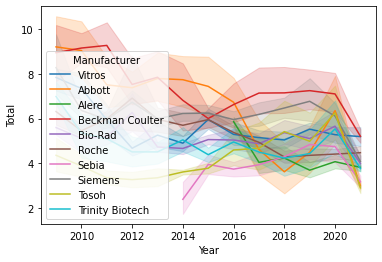

In [80]:
sns.lineplot(x="Year", y="Total",
             hue="Manufacturer", 
             data=top10_manufacturers)

# Modeling

In [81]:
#model regressie trainen en testen
#R2 zegt iets over de bruikbaarheid van je model
traindata, testdata = train_test_split(Siemens, train_size=0.65, test_size=0.35, random_state=42)

#eerst afhankelijke variabele, dus hierbij 'Manufacturer'
mod1 = ols(formula='Year ~ Total', data=traindata).fit()
print(mod1.summary())



                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.783
Date:                Fri, 20 May 2022   Prob (F-statistic):            0.00943
Time:                        06:00:58   Log-Likelihood:                -1560.5
No. Observations:                 596   AIC:                             3125.
Df Residuals:                     594   BIC:                             3134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2016.5359      0.380   5301.067      0.0

In [82]:
# traindata, testdata = train_test_split(df, train_size=0.65, test_size=0.35, random_state=42)
df=df.dropna()
X_train, X_test, Y_train, Y_test = train_test_split(df["Year"].values, df["Manufacturer"].values, test_size = .20, random_state = 40)


# for name, data in manufacturers:
#     model=ols("Manufacturer ~ Total", data=traindata)
#     # results = model.fit(traindata, testdata)
#     # predicted=results.predict(testdata) 
#     results =model.fit(X_train, Y_train)
#     predicted = results.predict(X_test)
#     residuals = testdata['Manufacturer'] - predicted
#     residual_data = pd.DataFrame({'Manufacturer': testdata['Manufacturer'], 'Total': testdata['Total']})
#     print(residual_data)
#     sns.lineplot(residual_data,x='Manufacturer', y='Total')

#https://machinelearningmastery.com/make-predictions-scikit-learn/
    


P-value:  0.29832513292115415


C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


P-value:  0.0005223415649840082
P-value:  0.015706246483592756
P-value:  1.3298305329328812e-05


C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


P-value:  5.311706454667253e-05
P-value:  0.0001897961178381753
P-value:  1.263902508743313e-13


C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.w

P-value:  0.004083164152009766
P-value:  0.03195258146417273
P-value:  2.0308767349472093e-05


C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.w

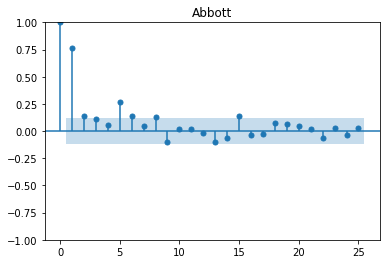

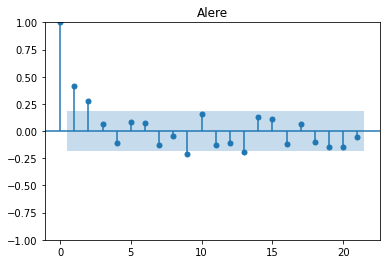

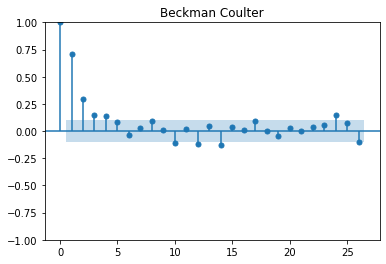

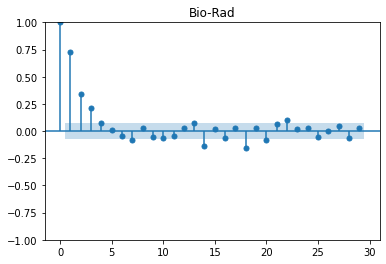

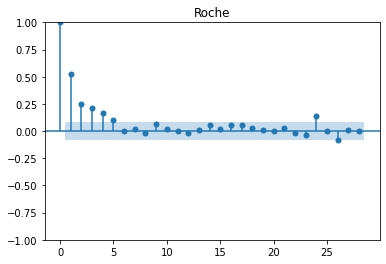

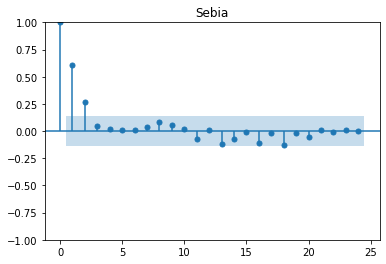

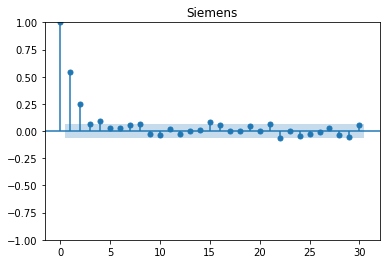

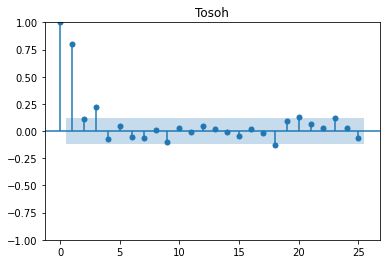

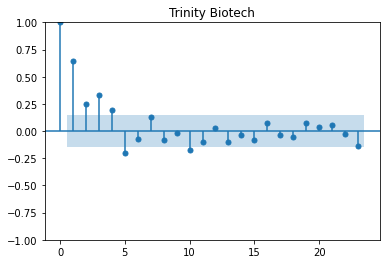

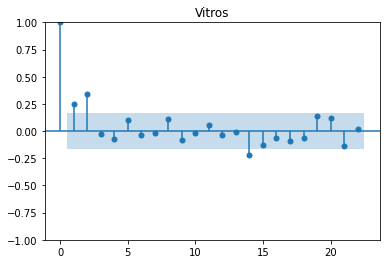

In [83]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
manufacturers = top10_manufacturers.groupby("Manufacturer")

for name, data in manufacturers:
    
    df_stationarityTest = adfuller(data['Total'], autolag='AIC')
    # Check the value of p
    print("P-value: ", df_stationarityTest[1])
    pacf = plot_pacf(data['Total'], title=name)

In [88]:
from statsmodels.tsa.ar_model import AutoReg
# Create training and test data
for name, data in manufacturers:
    train_data = data['Total'][:len(df)-100]
    test_data = data['Total'][len(df)-100:]
    #
    # Instantiate and fit the AR model with training data
    #
    ar_model = AutoReg(train_data, lags=1).fit()
    #
    # Print Summary
    #
    print(ar_model.summary())
    



TypeError: AutoReg.__init__() missing 1 required positional argument: 'lags'

C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\femke\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


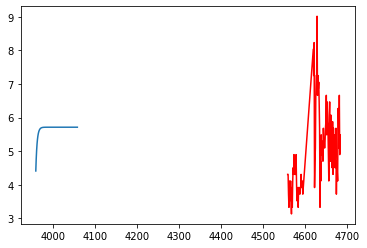

In [85]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

243.712260740744
243.712260740744
243.712260740744
243.712260740744
243.712260740744
243.712260740744
243.712260740744
243.712260740744
243.712260740744
243.712260740744


ValueError: Unrecognized character T in format string

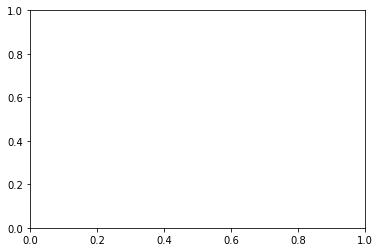

In [86]:
for name, data in manufacturers:
    tempdf = df[['Year', 'Total']].dropna()

    X = tempdf.iloc[:, :-1].values
    Y = tempdf.iloc[:, 1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)

    print(regressor.intercept_)
    from matplotlib import pyplot

    
for name, data in manufacturers:
    # line plot for Total Error with seaborn
    # if name == "Abbott":
        # sns.set(rc = {'figure.figsize':(25,8)})
        # l = sns.lineplot(x='Year', y='Total Error', data=data)
        # sns.lineplot(x='Year', y={regressor.intercept_}, data=data)
        # l.set_title(name)
        # plt.show()
        pyplot.plot('Year','Total Error',data=tempdf, color='red')
        pyplot.plot('Year','Total Error', data=regressor.intercept_)
